In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ipywidgets import interact

In [19]:
df = pd.read_csv("sisal_2022.csv", skiprows=8, usecols=[0,1,2,3,5,9],
           names=["Tiempo","Temp","HR","WS","WD","Rad"], index_col=0, parse_dates=True)

In [30]:
df_h = df.resample("H").mean()
df_h.fillna(method="bfill", inplace=True)

C:\Users\dacr9\AppData\Local\Temp\ipykernel_9620\566649471.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_h.fillna(method="bfill", inplace=True)


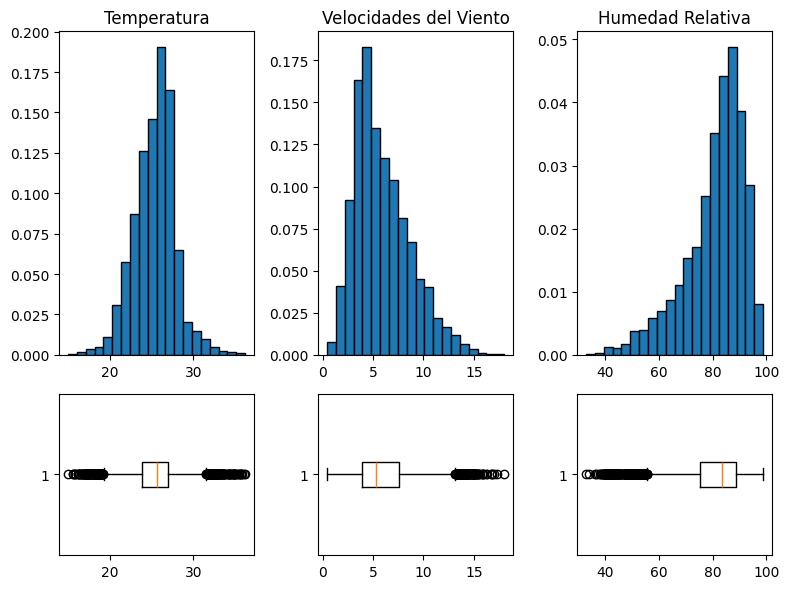

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8,6), height_ratios=[4,2])
ax = ax.flatten()

ax[0].hist(df_h.Temp, density=True, ec="k", bins=20)
ax[3].boxplot(df_h.Temp, vert=False)
ax[0].set_title("Temperatura")

ax[1].hist(df_h.WS, density=True, ec="k", bins=20)
ax[4].boxplot(df_h.WS, vert=False)
ax[1].set_title("Velocidades del Viento")

ax[2].hist(df_h.HR, density=True, ec="k", bins=20)
ax[5].boxplot(df_h.HR, vert=False)
ax[2].set_title("Humedad Relativa")

plt.tight_layout()

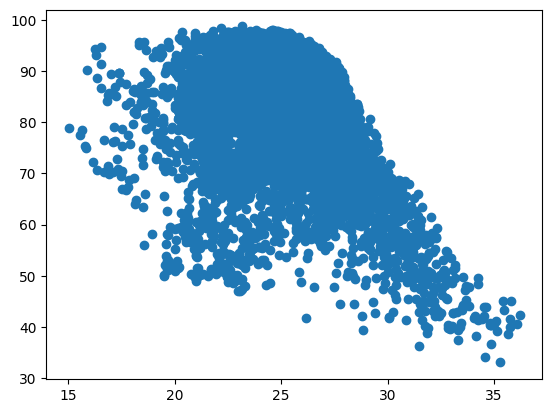

In [40]:
fig, ax = plt.subplots()
ax.scatter(df_h.Temp, df_h.HR)

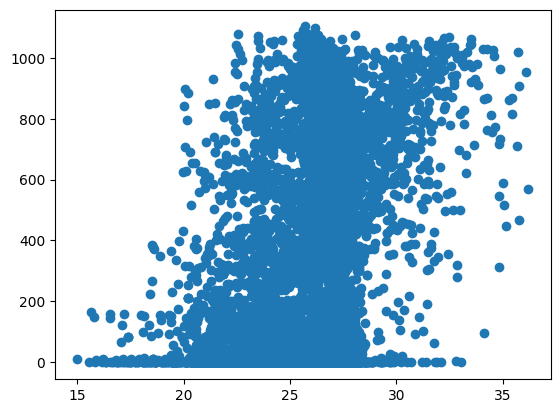

In [42]:
fig, ax = plt.subplots()
ax.scatter(df_h.Temp, df_h.Rad)

In [44]:
matriz_cor = df_h.corr()

<Axes: >

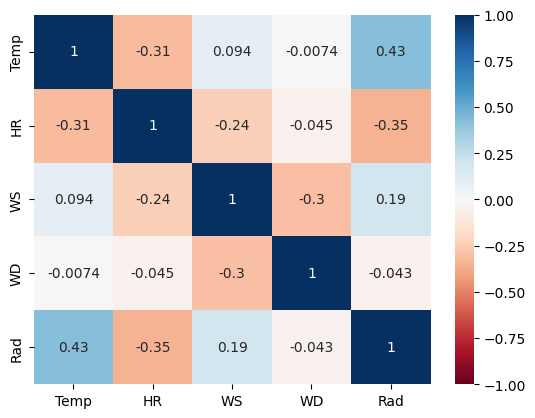

In [48]:
sns.heatmap(matriz_cor, annot=True, cmap="RdBu", vmin=-1, vmax=1)

<Axes: >

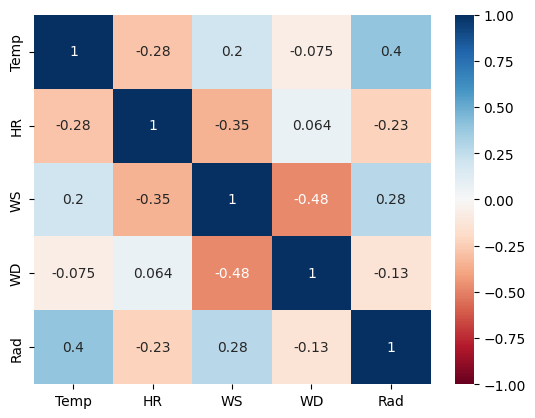

In [49]:
matriz_corsp = df_h.corr(method="spearman")
sns.heatmap(matriz_corsp, annot=True, cmap="RdBu", vmin=-1, vmax=1)

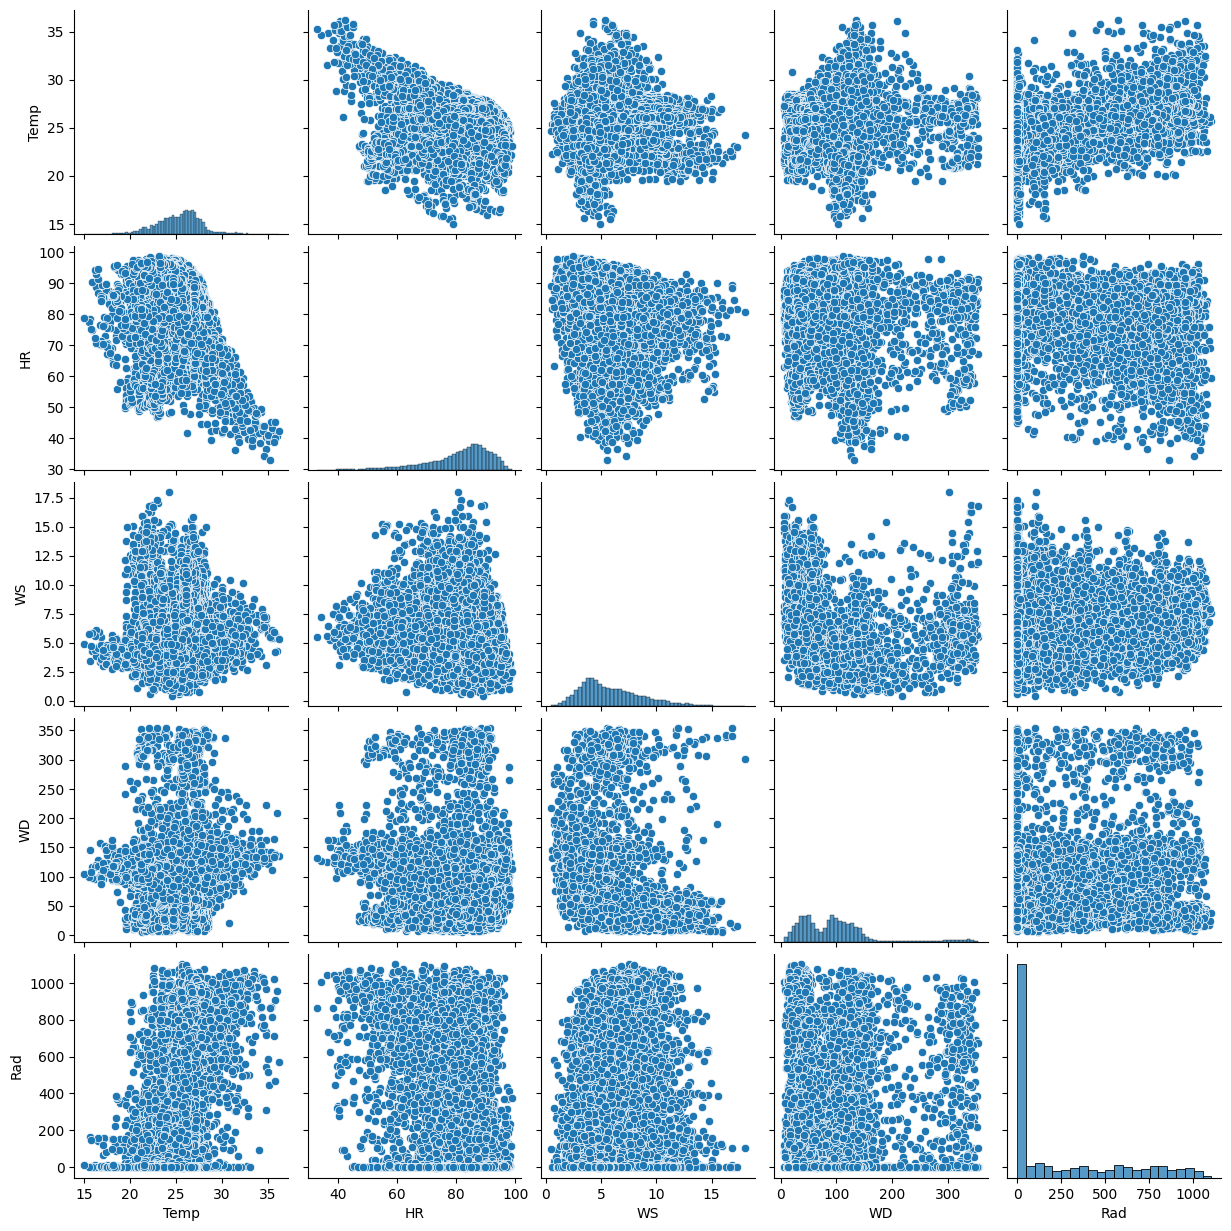

In [50]:
sns.pairplot(df_h)

In [79]:
coef = np.polyfit(df_h.Temp, df_h.HR, deg=3)
p = np.poly1d(coef)

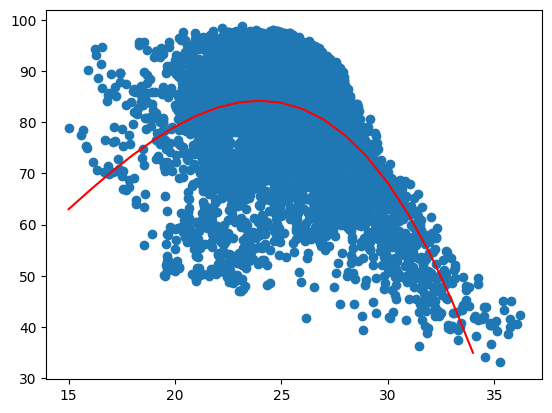

In [80]:
fig, ax = plt.subplots()
ax.scatter(df_h.Temp, df_h.HR)
ax.plot(np.arange(15,35),p(np.arange(15,35)), color="red")

In [82]:
valores_y = df_h.Rad["2022-01-01"].values
valores_x = np.arange(0,24,1)

In [96]:
def ajuste(grado):
    coef = np.polyfit(valores_x, valores_y, deg=grado)
    p = np.poly1d(coef)
    plt.plot(valores_x, valores_y)
    plt.plot(valores_x, p(valores_x))

In [97]:
interact(ajuste, grado=(0,12))

interactive(children=(IntSlider(value=6, description='grado', max=12), Output()), _dom_classes=('widget-intera…

<function __main__.ajuste(grado)>

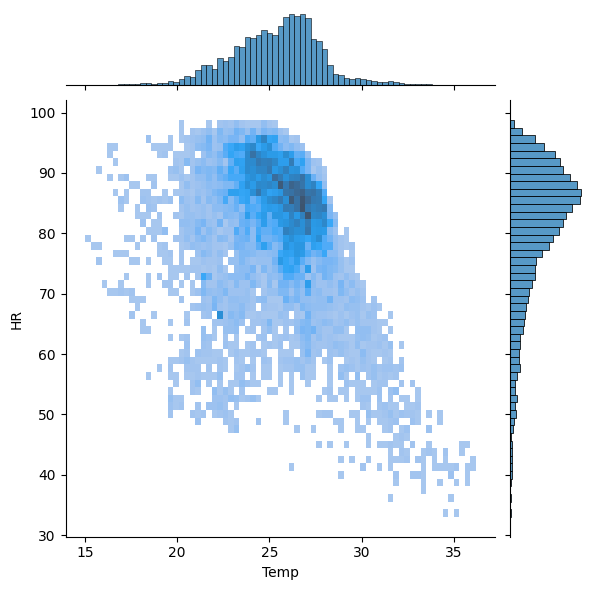

In [103]:
sns.jointplot(x=df_h.Temp, y=df_h.HR, kind="hist")